In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import root_pandas as rp
import analysis

Welcome to JupyROOT 6.22/02


In [2]:
a = analysis.analysis(E_cut = {'palila': 8, 'iiwi': 8.8, 'tako': 6, 'nene': 5.5, 'elepaio': 6, 'humu': 6.6})
dfs = a.get_tpc_data()

In [3]:
skb = a.get_raw_study_data()
skb['ts'] = skb['ts'].astype('int')

In [4]:
for tpc in dfs.keys():
    dfs[tpc]['count']=1
    dfs[tpc] = dfs[tpc].loc[(dfs[tpc]['ts'].isin(skb['ts'])) & (dfs[tpc]['is_recoil']==1)]
    dfs[tpc].index = [i for i in range(0,len(dfs[tpc]))]
    skb['%s_neutrons'%(tpc)] = 0
    index = skb.loc[skb['ts'].isin(dfs[tpc]['ts'])].index.to_numpy()
    skb['%s_neutrons'%(tpc)][index] = dfs[tpc].groupby(dfs[tpc]['ts']).sum()['count'].to_numpy()

Series([], Name: ECL_lumi, dtype: float64)

In [28]:
len(dfs['iiwi'])

4392

In [5]:
for tpc in dfs.keys():
    print(tpc)
    tmp = skb.loc[skb['ts'].isin(dfs[tpc]['ts'])]
    I_LER = []
    I_HER = []
    Sy_LER = []
    Sy_HER = []
    Nb_LER = []
    Nb_HER = []
    Lumi = []
    LER_flag = []
    HER_flag = []
    Lumi_flag = []
    cinj_flag = []
    decay_flag = []
    for Il, Ih, Syl, Syh, Nbl, Nbh, lumi, rate, fler, fher, flum, fci, fd in zip(tmp['I_LER'], tmp['I_HER'], tmp['Sy_LER'], tmp['Sy_HER'], tmp['Nb_LER'], 
                                                tmp['Nb_HER'], tmp['ECL_lumi'], tmp['%s_neutrons'%(tpc)], tmp['LER_study_flag'], tmp['HER_study_flag'], 
                                                tmp['Lumi_study_flag'],tmp['Cont_inj_flag'], tmp['Decay_flag']):
        if rate > 1:
            for i in range(0,rate):
                I_LER.append(Il)
                I_HER.append(Ih)
                Sy_LER.append(Syl)
                Sy_HER.append(Syh)
                Nb_LER.append(Nbl)
                Nb_HER.append(Nbh)
                Lumi.append(lumi)
                LER_flag.append(fler)
                HER_flag.append(fher)
                Lumi_flag.append(flum)
                cinj_flag.append(fci)
                decay_flag.append(fd)
        else:
            I_LER.append(Il)
            I_HER.append(Ih)
            Sy_LER.append(Syl)
            Sy_HER.append(Syh)
            Nb_LER.append(Nbl)
            Nb_HER.append(Nbh)
            Lumi.append(lumi)
            LER_flag.append(fler)
            HER_flag.append(fher)
            Lumi_flag.append(flum)
            cinj_flag.append(fci)
            decay_flag.append(fd)
    dfs[tpc]['I_LER'] = I_LER
    dfs[tpc]['I_HER'] = I_HER
    dfs[tpc]['Sy_LER'] = Sy_LER
    dfs[tpc]['Sy_HER'] = Sy_HER
    dfs[tpc]['Nb_LER'] = Nb_LER
    dfs[tpc]['Nb_HER'] = Nb_HER
    dfs[tpc]['Luminosity'] = Lumi
    dfs[tpc]['LER'] = LER_flag
    dfs[tpc]['HER'] = HER_flag
    dfs[tpc]['Lumi'] = Lumi_flag
    dfs[tpc]['Cont_inj'] = cinj_flag
    dfs[tpc]['Decay'] = decay_flag

iiwi
humu
nene
tako
palila
elepaio


In [71]:
avgs = {}
errs = {}
nsecs = 15
for tpc in dfs.keys():
    print(tpc, int((dfs[tpc]['ts'].max()-dfs[tpc]['ts'].min())/nsecs))
    avgs[tpc] = dfs[tpc].groupby(pd.cut(dfs[tpc]['ts'], bins = np.linspace(dfs[tpc]['ts'].min(),dfs[tpc]['ts'].max(),int((dfs[tpc]['ts'].max()-dfs[tpc]['ts'].min())/nsecs)))).mean()
    errs[tpc] = dfs[tpc].groupby(pd.cut(dfs[tpc]['ts'], bins = np.linspace(dfs[tpc]['ts'].min(),dfs[tpc]['ts'].max(),int((dfs[tpc]['ts'].max()-dfs[tpc]['ts'].min())/nsecs)))).std()
    avgs[tpc]['rate'] = dfs[tpc].groupby(pd.cut(dfs[tpc]['ts'], bins = np.linspace(dfs[tpc]['ts'].min(),dfs[tpc]['ts'].max(),int((dfs[tpc]['ts'].max()-dfs[tpc]['ts'].min())/nsecs))))['count'].sum()/60
    avgs[tpc]['rate_err'] = np.sqrt(dfs[tpc].groupby(pd.cut(dfs[tpc]['ts'], bins = np.linspace(dfs[tpc]['ts'].min(),dfs[tpc]['ts'].max(),int((dfs[tpc]['ts'].max()-dfs[tpc]['ts'].min())/nsecs))))['count'].sum())/60

iiwi 2266
humu 2266
nene 2266
tako 2266
palila 2265
elepaio 2266


In [58]:
data = {}
data['HER_decay'] = {}
data['LER_decay'] = {}
data['Lumi_decay'] = {}
data['HER_inj'] = {}
data['LER_inj'] = {}
data['Lumi_inj'] = {}
for tpc in avgs.keys():
    data['HER_decay'][tpc] = avgs[tpc].loc[(avgs[tpc]['HER']>0) & (avgs[tpc]['Decay']>0) & (avgs[tpc]['rate']>0)]
    data['LER_decay'][tpc] = avgs[tpc].loc[(avgs[tpc]['LER']>0) & (avgs[tpc]['Decay']>0) & (avgs[tpc]['rate']>0)]
    data['Lumi_decay'][tpc] = avgs[tpc].loc[(avgs[tpc]['Lumi']>0) & (avgs[tpc]['Decay']>0) & (avgs[tpc]['rate']>0)]
    data['HER_inj'][tpc] = avgs[tpc].loc[(avgs[tpc]['HER']>0) & (avgs[tpc]['Cont_inj']>0) & (avgs[tpc]['rate']>0)]
    data['LER_inj'][tpc] = avgs[tpc].loc[(avgs[tpc]['LER']>0) & (avgs[tpc]['Cont_inj']>0) & (avgs[tpc]['rate']>0)]
    data['Lumi_inj'][tpc] = avgs[tpc].loc[(avgs[tpc]['Lumi']>0) & (avgs[tpc]['Cont_inj']>0) & (avgs[tpc]['rate']>0)]

In [63]:
import ROOT
from array import array
fits = {}
def fit(rate,rate_err,x1,x2):
    fit = {}
    f2 = ROOT.TF2("f2","[0] + [1]*x + [2]*y")
    f2.SetParLimits(0,0,10)
    f2.SetParLimits(1,0,10)
    f2.SetParLimits(2,0,10)
    x1err= array('d',[0 for i in range(0,len(x1))])
    x2err= array('d',[0 for i in range(0,len(x2))])
    gr = ROOT.TGraph2DErrors(len(x1), x1, x2, rate, x1err, x2err, rate_err)
    gr.Fit(f2, 'SEM')
    fit['B0'] = f2.GetParameter(0)
    fit['B1'] = f2.GetParameter(1)
    fit['T'] = f2.GetParameter(2)
    fit['B0_err'] = f2.GetParError(0)
    fit['B1_err'] = f2.GetParError(1)
    fit['T_err'] = f2.GetParError(2)
    
    return fit
for bgType in data.keys():
    fits[bgType] = {}
    print(1)
    for tpc in data[bgType].keys():
        if bgType == 'HER_decay' or bgType == 'HER_inj':
            fits[bgType][tpc] = fit(array('d',data[bgType][tpc]['rate']/data[bgType][tpc]['I_HER']), 
            array('d',data[bgType][tpc]['rate_err']/data[bgType][tpc]['I_HER']),
            array('d', data[bgType][tpc]['I_HER']),
            array('d', data[bgType][tpc]['I_HER']/(data[bgType][tpc]['Sy_HER']*data[bgType][tpc]['Nb_HER'])))
            
            data[bgType][tpc]['pred_rate'] = fits[bgType][tpc]['B0']*data[bgType][tpc]['I_HER'] 
            + fits[bgType][tpc]['B1']*data[bgType][tpc]['I_HER']**2 
            + fits[bgType][tpc]['T']*data[bgType][tpc]['I_HER']**2/(data[bgType][tpc]['Sy_HER']*data[bgType][tpc]['Nb_HER']) 
        if bgType == 'LER_decay' or bgType == 'LER_inj':
            fits[bgType][tpc] = fit(array('d',data[bgType][tpc]['rate']/data[bgType][tpc]['I_LER']), 
            array('d',data[bgType][tpc]['rate_err']/data[bgType][tpc]['I_LER']),
            array('d', data[bgType][tpc]['I_LER']),
            array('d', data[bgType][tpc]['I_LER']/(data[bgType][tpc]['Sy_LER']*data[bgType][tpc]['Nb_LER'])))
            
            data[bgType][tpc]['pred_rate'] = fits[bgType][tpc]['B0']*data[bgType][tpc]['I_LER'] 
            + fits[bgType][tpc]['B1']*data[bgType][tpc]['I_LER']**2 
            + fits[bgType][tpc]['T']*data[bgType][tpc]['I_LER']**2/(data[bgType][tpc]['Sy_LER']*data[bgType][tpc]['Nb_LER']) 

1
1
1
1
1
1
 FCN=4.18417 FROM MINOS     STATUS=SUCCESSFUL     57 CALLS         476 TOTAL
                     EDM=4.21728e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.81000e-05   1.00699e-05   8.37526e-08   1.61716e-01
   2  p1           0.00000e+00   2.70410e-08   6.81831e-11** at limit **
   3  p2           2.22045e-15   9.22329e-04   9.22329e-04** at limit **
 FCN=1.45968 FROM MINOS     STATUS=SUCCESSFUL     66 CALLS         505 TOTAL
                     EDM=1.63606e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.61569e-05   1.42168e-05   8.65699e-08   1.70824e-01
   2  p1           0.00000e+00   6.07113e-08  -3.11663e-09** at limit **
   3  p2           1.

Warning in <TROOT::Append>: Replacing existing TGraph2D: Graph2D (Potential memory leak).


In [64]:
for period in ['inj','decay']:
    for tpc in ['iiwi','nene','humu']:
        data['Lumi_%s'%(period)][tpc]['scale_rate'] = data['Lumi_%s'%(period)][tpc]['rate']-(fits['LER_%s'%(period)][tpc]['B0']*data['Lumi_%s'%(period)][tpc]['I_LER'] 
        + fits['LER_%s'%(period)][tpc]['B1']*data['Lumi_%s'%(period)][tpc]['I_LER']**2 
        + fits['LER_%s'%(period)][tpc]['T']*data['Lumi_%s'%(period)][tpc]['I_LER']**2/(data['Lumi_%s'%(period)][tpc]['Sy_LER']*data['Lumi_%s'%(period)][tpc]['Nb_LER'])) 

In [65]:
for period in ['inj','decay']:
    for tpc in ['palila','tako','elepaio','iiwi','nene','humu']:
        data['Lumi_%s'%(period)][tpc]['scale_rate'] = data['Lumi_%s'%(period)][tpc]['rate']-((fits['HER_%s'%(period)][tpc]['B0']*data['Lumi_%s'%(period)][tpc]['I_HER'] 
                                                                             + fits['HER_%s'%(period)][tpc]['B1']*data['Lumi_%s'%(period)][tpc]['I_HER']**2 
                                                                             + fits['HER_%s'%(period)][tpc]['T']*data['Lumi_%s'%(period)][tpc]['I_HER']**2/(data['Lumi_%s'%(period)][tpc]['Sy_HER']*data['Lumi_%s'%(period)][tpc]['Nb_HER'])) 
                                                                                             + (fits['LER_%s'%(period)][tpc]['B0']*data['Lumi_%s'%(period)][tpc]['I_LER'] 
                                                                                                + fits['LER_%s'%(period)][tpc]['B1']*data['Lumi_%s'%(period)][tpc]['I_LER']**2 
                                                                                                + fits['LER_%s'%(period)][tpc]['T']*data['Lumi_%s'%(period)][tpc]['I_LER']**2/(data['Lumi_%s'%(period)][tpc]['Sy_LER']*data['Lumi_%s'%(period)][tpc]['Nb_LER']))) 

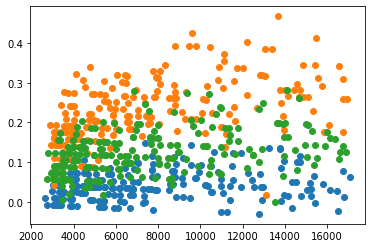

In [69]:
bgType='Lumi_decay'
#for tpc in ['iiwi','nene','humu']:
for tpc in ['palila','tako','elepaio']:
    plt.plot(data[bgType][tpc]['Luminosity'],data[bgType][tpc]['scale_rate'],'o')

In [49]:
fits

{'HER_decay': {'iiwi': {'B0': 5.615201629949329e-05,
   'B1': 0.0,
   'T': 4.9960036108132044e-15,
   'B0_err': 1.1596936345947828e-05,
   'B1_err': 4.078689969100324e-08,
   'T_err': 0.0010242618588721109},
  'humu': {'B0': 4.615693757759054e-05,
   'B1': 0.0,
   'T': 1.3491541217547365e-10,
   'B0_err': 1.4216796463129011e-05,
   'B1_err': 6.07113406769777e-08,
   'T_err': 0.0017861598940835388},
  'nene': {'B0': 4.811972150020605e-05,
   'B1': 0.0,
   'T': 8.940626017306386e-12,
   'B0_err': 1.1517959849494108e-05,
   'B1_err': 4.327108810153746e-08,
   'T_err': 0.006669061948030852},
  'tako': {'B0': 5.205253610807148e-05,
   'B1': 1.1102230246251565e-15,
   'T': 0.00034155420354953225,
   'B0_err': 1.4473709715745464e-05,
   'B1_err': 9.890673835499797e-09,
   'T_err': 0.001234668488495072},
  'palila': {'B0': 6.490586579643853e-05,
   'B1': 0.0,
   'T': 0.00041762954946289454,
   'B0_err': 1.5059747648926702e-05,
   'B1_err': 9.209710494229029e-09,
   'T_err': 0.00134244563333690

In [123]:
LER_decay[tpc]['pred_rate'] = f['B0']*LER_decay[tpc]['I_LER']+f['T']*LER_decay[tpc]['I_LER']**2/(LER_decay[tpc]['Sy_LER']*LER_decay[tpc]['Nb_LER'])

In [32]:
fits.keys()

dict_keys(['HER_decay', 'LER_decay', 'Lumi_decay', 'HER_inj', 'LER_inj', 'Lumi_inj'])

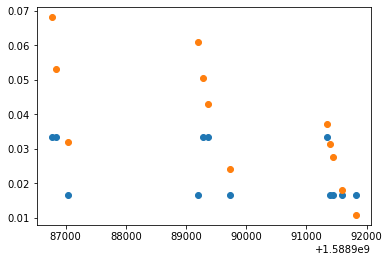

In [124]:
plt.plot(LER_decay[tpc]['ts'],LER_decay[tpc]['rate'],'o')
plt.plot(LER_decay[tpc]['ts'],LER_decay[tpc]['pred_rate'],'o')